## 35. Цепная линия

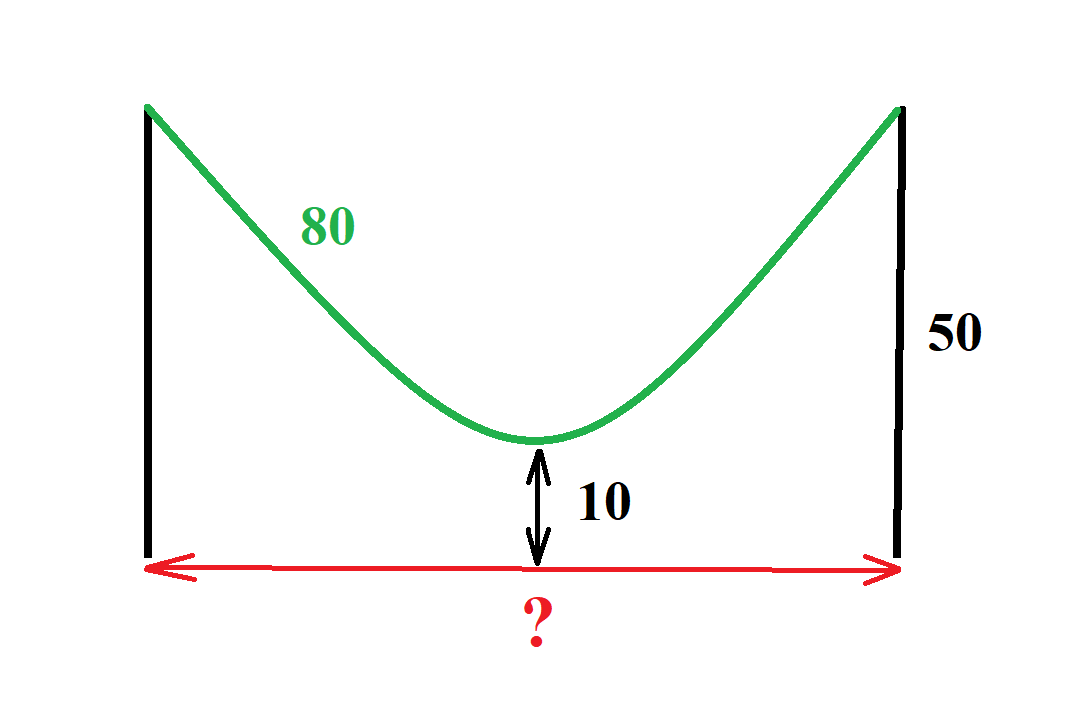

В Интернете следующую задачу распространяют под именем *задача Джеффа Безоса*. Говорят, что ее дают на собеседовании в Амазон. На решение — 5 секунд. 



> Кабель длиной $80$ метров висит на двух столбах. Высота каждого столба — $50$ метров. Каково расстояние между столбами, если центр провисающего кабеля находится на высоте $10$ метров от земли?



В таком варианте задачу действительно можно решить мгновенно, но она становится заметно сложнее при других числовых условиях.

Однородная веревка, подвешенная в двух разных точках за свои концы, принимает вид так называемой _цепной линии_
$$
y = y_0 + a \cosh \frac{x-x_0}{a}, \qquad a > 0.
$$
Функция $\cosh x$ – это _гиперболический косинус_. Он выражается через экспоненту следующим образом:
$$
\cosh x = \frac{e^x + e^{-x}}{2}.
$$
Параметры $a$, $x_0$, $y_0$ можно найти, зная длину веревки $\ell$ и координаты точек $(x_1, y_1)$ и $(x_2, y_2)$, в которых закреплены концы веревки. 

Длина дуги цепной линии равна
$$
\ell = a\left(\sinh\frac{x_2 - x_0}{a} - \sinh\frac{x_1 - x_0}{a}\right).
$$
Функция $\sinh x$ – это _гиперболический синус_. Он равен
$$
\sinh x = \frac{e^x - e^{-x}}{2}.
$$

0. Решить (устно) задачу Джеффа Безоса в первоначальном варианте.

1. Построить графики гиперболического косинуса и гиперболического синуса.

2. Составить систему уравнений ($3$ уравнения, $3$ неизвестных), для определения параметров цепной линии по значениям длины веревки и координатам концов. Всегда ли данная система совместна и имеет единственное решение?

3. Написать и отладить функцию, которая по значениям длины веревки и координатам концов находит все параметры цепной линии. Для решения системы уравнений воспользуйтесь функцией `scipy.optimize.newton`. 

4. Построить соответствующие цепные линии (в одних осях координат) для концевых точек $(-1,1)$, $(1,1)$ и разных значений $\ell = 2,3,4,5$.

5. Построить соответствующие цепные линии (в одних осях координат) для концевых точек $(-1,1)$, $(1,0)$ и разных значений $\ell = 3,4,5$.

Интересно сравнить построенные кривые с параболами $y = ax^2 + bx + c$, где $a>0$, заданной длины, проходящими через заданные точки. Задача построения такой параболы также сводится к решению аналогичной системы уравнений.

Длина дуги параболы равна:
$$
\ell = 
\frac{1}{4a} 
\Bigl(
\bigl(d_2\sqrt{1 + d_2^2} + {\rm arsinh}\,d_2 \bigr)
-
\bigl(d_1\sqrt{1 + d_1^2} + {\rm arsinh}\,d_1 \bigr)
\Bigr),
\qquad
d_1 = 2ax_1 + b,
\qquad
d_2 = 2ax_2 + b,
$$
где ${\rm arsinh}\, x = \ln(x + \sqrt{x^2 + 1})$ – это _ареасинус_ – функция, обратная к $\sinh x$.

6. Составить систему уравнений ($3$ уравнения, $3$ неизвестных), для определения параметров такой параболы. Всегда ли данная система совместна и имеет единственное решение?

7. Написать и отладить функцию, которая по значениям длины дуги и координатам концов находит все параметры параболы. Для решения системы уравнений воспользуйтесь функцией `scipy.optimize.newton`. 

8. В тех же осях координат, что и в п.4, построить параболы, проходящие через точки $(-1,1)$, $(1,1)$ и соответствующие разным значениям $\ell = 2,3,4,5$.

9. В тех же осях координат, что и в п.5, построить параболы, проходящие через точки $(-1,1)$, $(1,0)$ и соответствующие разным значениям $\ell = 3,4,5$. Обратите внимание, что построенные параболы получаются более остроугольными, чем цепные линии.

10. Сделайте выводы.

## 0. Устное решение задачи



Если уменьшить высоту каждого столба так, чтобы центр провисающего кабеля находился на поверхности, то мы получим 2 прямоугольных треугольника, каждый из которых имеет катет и гипотенузу равные 40. Это противоречие, потому что
гипотенуза всегда больше катетов.

### Подключение и инициализация библиотек

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## 1. Графики гиперболического косинуса и синуса


$$
\cosh x =  \frac{e^x + e^{-x}}{2}
\\
\sinh x =  \frac{e^x - e^{-x}}{2} 
$$

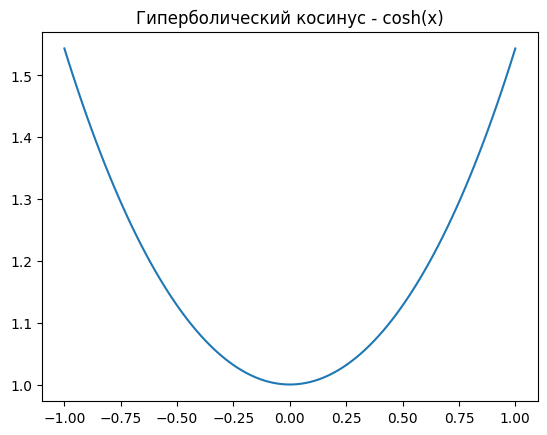

In [ ]:
x = np.linspace(-1, 1, 100)
y = (np.exp(x) + np.exp(-x)) / 2

plt.title('Гиперболический косинус - cosh(x)')
plt.plot(x, y)
pass

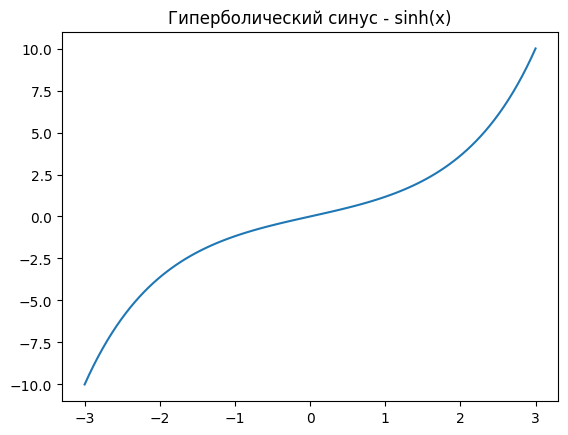

In [ ]:
x = np.linspace(-3, 3, 100)
y = (np.exp(x) - np.exp(-x)) / 2

plt.title('Гиперболический синус - sinh(x)')
plt.plot(x, y)
pass

## 2. Система уравнений для определения параметров цепной линии


Определим горизонтальное и вертикальное расстояние между концами цепи:

$$
h = |x_2 - x_1|\\
v = |y_2 - y_1|
$$

\

Мы получаем следующие значения для $x_0$ и $y_0$:

$$
x_0 = \frac{x_1 + x_2 - a\ln(\frac{l - v}{l + v})}{2}
\\
y_0 = \frac{y_1 + y_2 - l\coth(\frac{h}{2a})}{2}
$$

\

При попытке выразить $a$ получаем трансцедентное уравнение:

$$
\sqrt{l^2 - v^2} = 2a\sinh(\frac{h}{2a})
$$

\

Для нахождения параметров $a, x_0, y_0$ составляем систему из 3 уравнений:

$$
\left\{
\begin{array}{l}
\sqrt{l^2 - v^2} = 2a\sinh(\frac{h}{2a})
\\
x_0 = \frac{x_1 + x_2 - a\ln(\frac{l - v}{l + v})}{2}
\\
y_0 = \frac{y_1 + y_2 - l\coth(\frac{h}{2a})}{2}
\end{array}
\right.
$$
Система имеет решение когда длина цепной линии $l \ge |x_2 - x_1|$ иначе расстояние между точками, будем больше чем длина цепной линии, значит такую линии не получится изобразить




##3. Функция, которая по значениям длины веревки и координатам концов находит все параметры цепной линии.

In [3]:
def coth(x):
  return np.cosh(x) / np.sinh(x)

In [4]:
def f_h(x1, x2):
  return abs(x2 - x1)

def f_v(y1, y2):
  return abs(y2 - y1)

def f_x0(x1, y1, x2, y2, l, a):
  v = f_v(y1, y2)
  return (x1 + x2 - a*np.log((l - v)/(l + v)))/2

def f_y0(x1, y1, x2, y2, l, a):
  h = f_h(x1, x2)
  return (y1 + y2 - l*coth(h/(2*a)))/2

In [5]:
def a_eq(a, l, x1, y1, x2, y2):
  h = f_h(x1, x2)
  v = f_v(y1, y2)
  return np.sqrt(l**2 - v**2) - 2*a*np.sinh(h/(2*a))

def calc_a(l, x1, y1, x2, y2):
  return optimize.newton(a_eq, 0.6, args=(l, x1, y1, x2, y2), disp=False)

In [6]:
def f1(x, x0, y0, a):
  return y0 + a*np.cosh((x - x0)/a)

In [72]:
def draw_catenary(color, l, x1, y1, x2, y2):
  a = calc_a(l, x1, y1, x2, y2)
  x0 = f_x0(x1, y1, x2, y2, l, a)
  y0 = f_y0(x1, y1, x2, y2, l, a)

  x = np.arange(x1 - 0.05, x2 + 0.05, 0.01)
  y = f1(x, x0, y0, a)

  plt.plot(x, y, color=color)
  
  #print(f'---\nl = {l}\nx1 = {x1} | y1 = {y1}\nx2 = {x2} | y2 = {y2}\n\na = {a}\nx0 = {x0} | y0 = {y0}')

##4. Построение соответствующих цепных линий в концевых точках $(-1, 1)$, $(1, 1)$ и разных значений $l = 2, 3, 4, 5$.

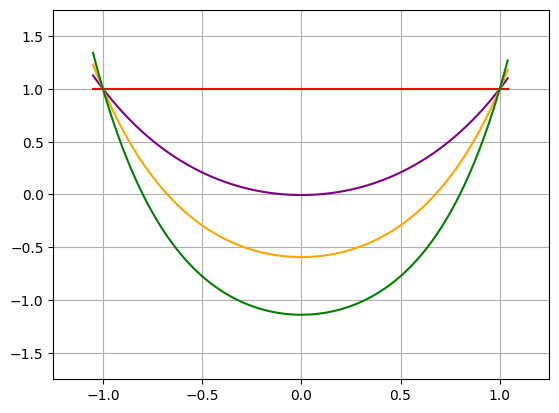

In [73]:
plt.grid()

plt.xlim([-1.25, 1.25])
plt.ylim([-1.75, 1.75])

plt.plot(label = 'l = 2')
draw_catenary('red', 2, -1, 1, 1, 1)
draw_catenary('purple', 3, -1, 1, 1, 1)
draw_catenary('orange', 4, -1, 1, 1, 1)
draw_catenary('green', 5, -1, 1, 1, 1)


pass

##5. Построение соответствующих цепных линий в концевых точках $(-1, 1)$, $(1, 0)$ и разных значений $l = 3, 4, 5$.

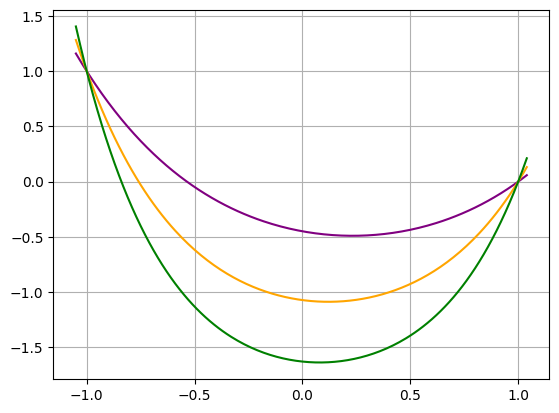

In [22]:
plt.grid()

draw_catenary('purple', 3, -1, 1, 1, 0)
draw_catenary('orange', 4, -1, 1, 1, 0)
draw_catenary('green', 5, -1, 1, 1, 0)

pass

##6. Система уравнений для определения параметров параболы.

Наша система выглядит следующим образом:
$$
\left\{
\begin{array}{l}
y = ax^2 + bx + c\\
d_1 = 2ax_1 + b\\
d_2 = 2ax_2 + b\\
l = \frac{1}{4a}(d_2\sqrt{1 + d_2} + arcsinhd_2 - d_1\sqrt{1 + d_1} - arcsinhd_1)
\end{array}
\right.
$$
Подставим в $(1)$ координаты креплений
$$
\left\{
\begin{array}{l}
y_1 = ax_1^2 + bx_1 + c\\
y_2 = ax_2^2 + bx_2 + c
\end{array}
\right.
⇒ y_2 - y_1 = a(x_2^2 - x_1^2) + b(x_2 - x_1) ⇒ b = \frac{y_2 - y_1}{x_2 - x_1} - a(x_1 + x_2)
$$
теперь выразим $d_1$ и $d_2$:
$$
d_1 = 2ax_1 + \frac{y_2 - y_1}{x_2 - x_1} - a(x_1 + x_2)\\
d_2 = 2ax_2 + \frac{y_2 - y_1}{x_2 - x_1} - a(x_1 + x_2)
$$
Заишем уравнение цепной линии в несколько другом виде, будем считать, что а может быть равно нулю, тогда: 
$$
d_2\sqrt{1 + d_2} + arcsinhd_2 - d_1\sqrt{1 + d_1} - arcsinhd_1 - 4al = 0
$$
Подставив $d_1$ и $d_2$ в новую формулу получим некотурую функцию одной перемменной. По ней находим $a$. Потом по $a$ находим $b$. А $c$ выразим из $(1)$: $c = y_1 - ax_1^2 - bx_1$

##7. Функция, которая по значениям длины веревки и координатам концов находит все параметры параболы.

In [76]:
def f_b(a, x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1) - (x1 + x2) * a

def f_d1(a, x1, y1, x2, y2):
    return 2 * a * x1 + f_b(a, x1, y1, x2, y2)

def f_d2(a, x1, y1, x2, y2):
    return 2 * a * x2 + f_b(a, x1, y1, x2, y2)

def arcsinh(x):
    return np.log(x + (1 + x**2) ** 0.5)
                            
def eval_a(a, l, x1, y1, x2, y2):
    d1 = f_d1(a, x1, y1, x2, y2)
    d2 = f_d2(a, x1, y1, x2, y2)
    return d2 * (1 + d2 ** 2) ** 0.5 + arcsinh(d2) - (d1 * (1 + d1 ** 2) ** 0.5 + arcsinh(d1)) - 4 * a * l

def calc_a_p(l, x1, y1, x2, y2):
    return optimize.newton(eval_a, 10, args=[l, x1, y1, x2, y2], maxiter=100, disp=False)

def f2(x, a, b, c):
    return a * x ** 2 + b * x + c

##8. Построение соответствующих парабол в концевых точках $(-1, 1), (1, 1)$, и разных значений $l = 2, 3, 4, 5.$

Здесь показано сравнение графика параболы и цепной линии, цепная линия покрашена чёрным цветом, параболы в цветной в зависимости от параметра $l.$

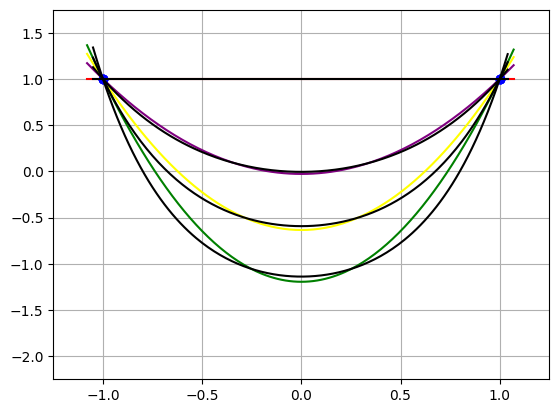

In [77]:
def draw_parabolic(color, l, x1, y1, x2, y2):
    a = calc_a_p(l, x1, y1, x2, y2)
    b = f_b(a, x1, y1, x2, y2)
    c = y1 - a * x1 ** 2 - b * x1

    # print("(a, b, c) = ", (a, b, c))
    
    x = np.arange(x1 - 0.08, x2 + 0.08, 0.01)
    y = f2(x, a, b, c)

    plt.plot(x, y, color=color)

    plt.plot(x1, y1, 'o', color='blue')
    plt.plot(x2, y2, 'o', color='blue')

plt.grid()

plt.xlim([-1.25, 1.25])
plt.ylim([-2.25, 1.75])
draw_parabolic('red', 2, -1, 1, 1, 1)
draw_parabolic('purple', 3, -1, 1, 1, 1)
draw_parabolic('yellow', 4, -1, 1, 1, 1)
draw_parabolic('green', 5, -1, 1, 1, 1)
for l in [2, 3, 4, 5]:
    draw_catenary('black', l, -1, 1, 1, 1)

##9. Построение соответствующих парабол в концевых точках $(-1, 1), (1, 0)$, и разных значений $l = 3, 4, 5.$

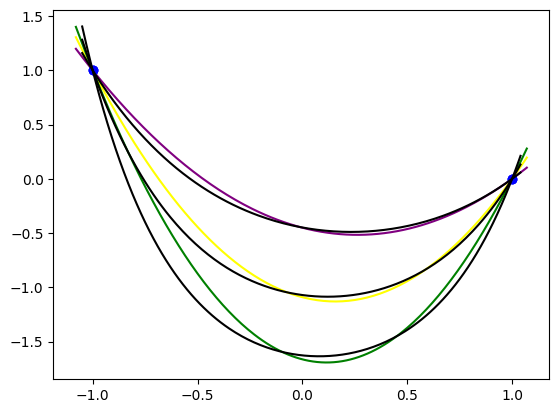

In [78]:
draw_parabolic('purple', 3, -1, 1, 1, 0)
draw_parabolic('yellow', 4, -1, 1, 1, 0)
draw_parabolic('green', 5, -1, 1, 1, 0)
for l in [3, 4, 5]:
    draw_catenary('black', l, -1, 1, 1, 0)

##10. Выводы. Несмотря на то, что графики параболы строятся гораздо легче, чем графиков цепной линии, они недостаточно точны. Для изображения провисающих кабелей гораздо правильнее будет использование формул цепной линии.